<a href="https://colab.research.google.com/github/JyotsnaPatil27/Jyo_code/blob/master/Jyo_code/REMOTE%40OSU/SolarWindDelay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob, pickle, json, os
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_1713_1.csv"))
df1 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_2124_1.csv"))
df2 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_2145_1.csv"))
df3 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_1713_1.csv"))
df4 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_2124_1.csv"))
df5 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_2145_1.csv"))
df6 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_AO_1713_1.csv"))
df7 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_GBT_1713_1.csv"))

In [ ]:
df8 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/Freq_PPTA_new.csv"))
df9 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/Freq_NG_new.csv"))

In [ ]:
toa_1713 = list(df["TOA_1713"])
toa_err_1713 = list(df["TOA_ERR_1713"])
toa_2124 = list(df1["TOA_2124"])
toa_err_2124 = list(df1["TOA_ERR_2124"])
toa_2145 = list(df2["TOA_2145"])
toa_err_2145 = list(df2["TOA_ERR_2145"])

In [ ]:
toa_ng_1713 = list(df3["TOA_ng_1713"])
toa_err_ng_1713 = list(df3["TOA_ERR_ng_1713"])
toa_ng_2124 = list(df4["TOA_ng_2124"])
toa_err_ng_2124 = list(df4["TOA_ERR_ng_2124"])
toa_ng_2145 = list(df5["TOA_ng_2145"])
toa_err_ng_2145 = list(df5["TOA_ERR_ng_2145"])

In [ ]:
toa_ng_1713_1, indices_1713 = np.unique(toa_ng_1713, return_index=True)
toa_err_ng_1713_1 = np.take(toa_err_ng_1713, indices_1713)
toa_ng_2124_1, indices_2124 = np.unique(toa_ng_2124, return_index=True)
toa_err_ng_2124_1 = np.take(toa_err_ng_2124, indices_2124)
toa_ng_2145_1, indices_2145 = np.unique(toa_ng_2145, return_index=True)
toa_err_ng_2145_1 = np.take(toa_err_ng_2145, indices_2145)

In [ ]:
len(toa_ng_1713_1), len(toa_ng_1713), len(toa_ng_2124), len(toa_ng_2145)

(7408, 59389, 4982, 18675)

In [ ]:
toa_1713_1 = list(df["MJD_1713"])
toa_2124_1 = list(df1["MJD_2124"])
toa_2145_1 = list(df2["MJD_2145"])

In [ ]:
toa_ng_1713_2 = list(df3["MJD_ng_1713"])
toa_ng_2124_2 = list(df4["MJD_ng_2124"])
toa_ng_2145_2 = list(df5["MJD_ng_2145"])
toa_ng_1713_3 = np.take(toa_ng_1713_2, indices_1713)
toa_ng_2145_3 = np.take(toa_ng_2145_2, indices_2145)

In [ ]:
len(toa_1713_1), len(toa_2124_1), len(toa_2145_1), len(toa_ng_1713_3), len(toa_ng_2124_2), len(toa_ng_2145_3)

(5141, 3411, 4944, 7408, 4982, 5662)

In [ ]:
freq_1713 = list(df8["freq_1713"])
freq_1713_1 = [x for x in freq_1713 if str(x) != 'nan']
freq_2145 = list(df8["freq_2145"])
freq_2145_1 = [x for x in freq_2145 if str(x) != 'nan']
freq_2124 = list(df8["freq_2124"])
freq_2124_1 = [x for x in freq_2124 if str(x) != 'nan']

In [ ]:
freq_ng_1713 = list(df9["freq_ng_1713"])
freq_ng_1713_1 = [x for x in freq_ng_1713 if str(x) != 'nan']
freq_ng_2124 = list(df9["freq_ng_2124"])
freq_ng_2124_1 = [x for x in freq_ng_2124 if str(x) != 'nan']
freq_ng_2145 = list(df9["freq_ng_2145"])
freq_ng_2145_1 = [x for x in freq_ng_2145 if str(x) != 'nan']

In [ ]:
len(toa_1713), len(toa_2124), len(toa_2145), len(toa_ng_1713_1), len(toa_ng_1713), len(toa_ng_2124_1), len(toa_ng_2145_1)

(5141, 3411, 4944, 7408, 59389, 582, 5662)

In [ ]:
len(freq_1713_1), len(freq_2124_1), len(freq_2145_1), len(freq_ng_1713_1), len(freq_ng_2124_1), len(freq_ng_2145_1)

(4944, 4944, 4944, 4982, 4982, 4982)

In [ ]:
def SolarWind_delay(NE_SW,freq):
  delay = (4.15*10**3*NE_SW)/(freq**2)   #unit-second
  return delay

In [ ]:
NE_SW_1713 = 5.0206514446838589999
NE_SW_2124 = 5.744822249890441
NE_SW_2145 = 6.0118246308458179999

In [ ]:
NE_SW = NE_SW_1713
delay_ppta_1713 =[]
for freq in freq_1713_1:
   f1713 = SolarWind_delay(NE_SW_1713,freq)
   delay_ppta_1713.append(f1713)
NE_SW = NE_SW_2124
delay_ppta_2124 =[]
for freq1 in freq_2124_1:
   f2124 = SolarWind_delay(NE_SW_2124,freq1)
   delay_ppta_2124.append(f2124)
NE_SW = NE_SW_2145
delay_ppta_2145 =[]
for freq2 in freq_2145_1:
   f2145 = SolarWind_delay(NE_SW_2145,freq2)
   delay_ppta_2145.append(f2145)

In [ ]:
len(delay_ppta_1713), len(delay_ppta_2124), len(delay_ppta_2145)

(4944, 4944, 4944)

In [ ]:
NE_SW = NE_SW_1713
delay_ng_1713 =[]
for freq4 in freq_ng_1713_1:
   f_ng1713 = SolarWind_delay(NE_SW_1713,freq4)
   delay_ng_1713.append(f_ng1713)
NE_SW = NE_SW_2124
delay_ng_2124 =[]
for freq5 in freq_ng_2124_1:
   f_ng2124 = SolarWind_delay(NE_SW_2124,freq5)
   delay_ng_2124.append(f_ng2124)
NE_SW = NE_SW_2145
delay_ng_2145 =[]
for freq6 in freq_ng_2145_1:
   f_ng2145 = SolarWind_delay(NE_SW_2145,freq6)
   delay_ng_2145.append(f_ng2145)

In [ ]:
len(delay_ng_1713), len(delay_ng_2124), len(delay_ng_2145)

(4982, 4982, 4982)

In [ ]:
delay = zip(delay_ppta_1713, delay_ppta_2124, delay_ppta_2145, delay_ng_1713, delay_ng_2124, delay_ng_2145)
with open('Delay.csv', 'w', newline='') as f:
  writer2 = csv.writer(f)
  for row in delay:
    writer2.writerow(row)

In [ ]:
delay_ppta_1713_1 = np.array(delay_ppta_1713)
delay_1713_1 = delay_ppta_1713_1[(delay_ppta_1713_1< 0.005) & (delay_ppta_1713_1 > 0.000)]
delay_1713_2 = delay_ppta_1713_1[(delay_ppta_1713_1 < 0.015) & (delay_ppta_1713_1 > 0.005)]
delay_1713_3= delay_ppta_1713_1[(delay_ppta_1713_1 < 0.035) & (delay_ppta_1713_1 > 0.015)]
delay_1713_4 = delay_ppta_1713_1[(delay_ppta_1713_1 < 0.04) & (delay_ppta_1713_1 > 0.035)]
delay_1713_5 = delay_ppta_1713_1[(delay_ppta_1713_1 < 0.05) & (delay_ppta_1713_1 > 0.04)]

In [ ]:
mid_1713 = np.median(delay_ppta_1713_1)
mean_1713 = np.mean(delay_ppta_1713_1)
std_1713 = np.std(delay_ppta_1713_1)
mid_1713, mean_1713, std_1713

(0.010625656109525303, 0.015107009380964005, 0.013776025617882624)

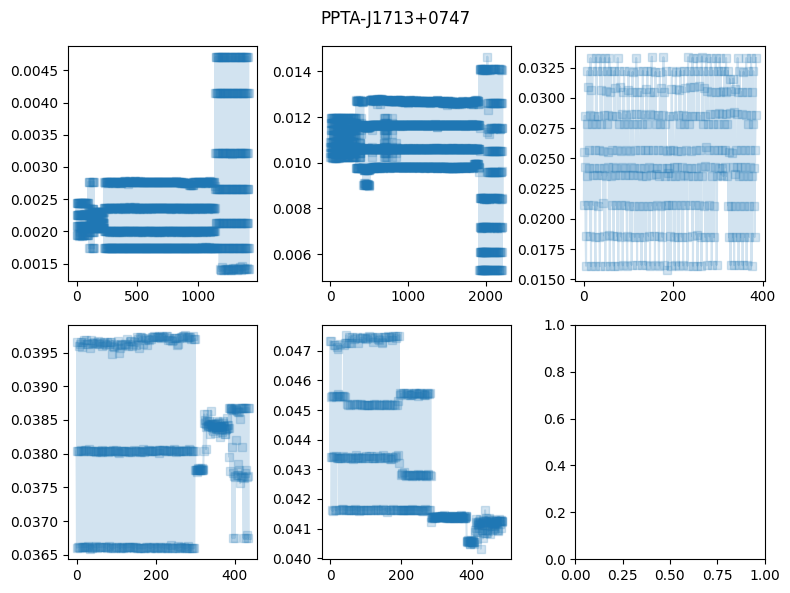

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(8,6))
axs[0,0].plot(delay_1713_1, marker = 's', alpha = 0.2)
axs[0,1].plot(delay_1713_2, marker = 's', alpha = 0.2)
axs[0,2].plot(delay_1713_3, marker = 's', alpha = 0.2)
axs[1,0].plot(delay_1713_4, marker = 's', alpha = 0.2)
axs[1,1].plot(delay_1713_5, marker = 's', alpha = 0.2)
fig.suptitle('PPTA-J1713+0747')
plt.tight_layout()
plt.show()

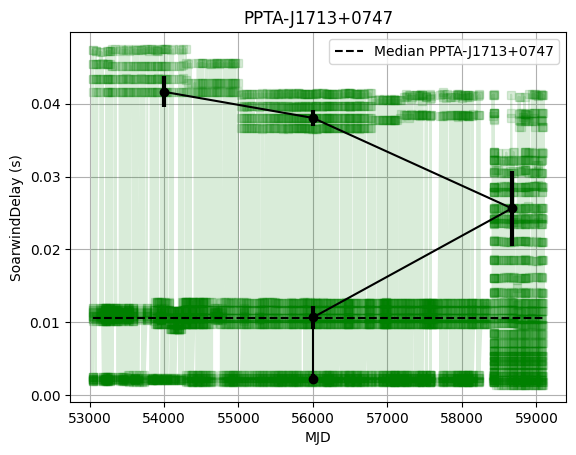

In [ ]:
x = [56000, 56000, 58670, 56000, 54000]
y = [np.median(delay_1713_1), np.median(delay_1713_2), np.median(delay_1713_3), np.median(delay_1713_4), np.median(delay_1713_5)]
y_error = [np.std(delay_1713_1), np.std(delay_1713_2), np.std(delay_1713_3), np.std(delay_1713_4), np.std(delay_1713_5)]
plt.plot((toa_1713_1[:4944]), delay_ppta_1713_1, color='green', marker = 's', alpha = 0.15)
plt.errorbar(x, y, yerr= y_error, color='black', elinewidth = 3, fmt='o-')
plt.hlines(mid_1713, min(toa_1713_1[:4944]), max(toa_1713_1[:4944]),color='black', linestyle = '--', label='Median PPTA-J1713+0747')
plt.xlabel('MJD')
plt.ylabel('SoarwindDelay (s)')
plt.title('PPTA-J1713+0747')
plt.grid()
plt.legend()
plt.show()

In [ ]:
delay_ppta_2124_1 = np.array(delay_ppta_2124)
delay_2124_1 = delay_ppta_2124_1[(delay_ppta_2124_1< 0.01) & (delay_ppta_2124_1 > 0.00)]
delay_2124_2 = delay_ppta_2124_1[(delay_ppta_2124_1 < 0.02) & (delay_ppta_2124_1 > 0.01)]
delay_2124_3= delay_ppta_2124_1[(delay_ppta_2124_1 < 0.04) & (delay_ppta_2124_1 > 0.02)]
delay_2124_4 = delay_ppta_2124_1[(delay_ppta_2124_1 < 0.06) & (delay_ppta_2124_1 > 0.04)]

In [ ]:
mid_2124 = np.median(delay_ppta_2124_1)
mean_2124 = np.mean(delay_ppta_2124_1)
std_2124 = np.std(delay_ppta_2124_1)
mid_2124, mean_2124, std_2124

(0.012156347930019159, 0.017708295354376756, 0.016054955916035882)

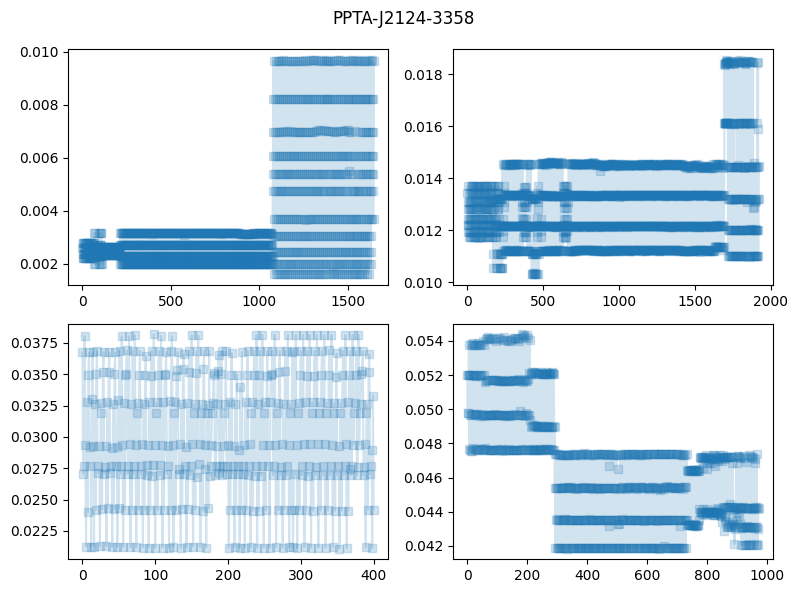

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(8,6))
axs[0,0].plot(delay_2124_1, marker = 's', alpha = 0.2)
axs[0,1].plot(delay_2124_2, marker = 's', alpha = 0.2)
axs[1,0].plot(delay_2124_3, marker = 's', alpha = 0.2)
axs[1,1].plot(delay_2124_4, marker = 's', alpha = 0.2)
fig.suptitle('PPTA-J2124-3358')
plt.tight_layout()
plt.show()

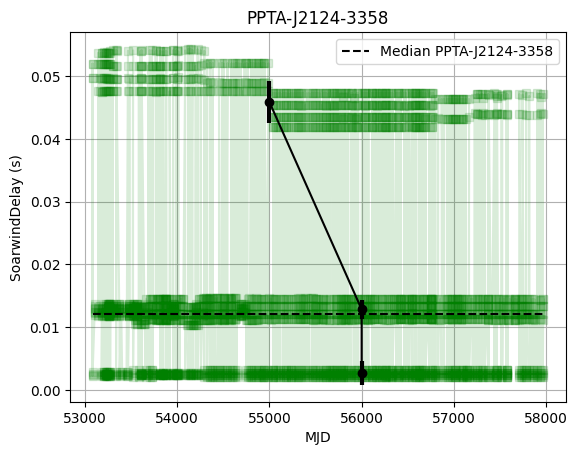

In [ ]:
x = [56000, 56000, 55000]
y = [np.median(delay_2124_1), np.median(delay_2124_2), np.median(delay_2124_4)]
y_error = [np.std(delay_2124_1), np.std(delay_2124_2), np.std(delay_2124_4)]
plt.plot((toa_2124_1), delay_ppta_2124_1[:3411], color='green', marker = 's', alpha = 0.15)
plt.errorbar(x, y, yerr= y_error, color='black', elinewidth = 3, fmt='o-')
plt.hlines(mid_2124, min(toa_2124_1[:3411]), max(toa_2124_1[:3411]),color='black', linestyle = '--', label='Median PPTA-J2124-3358')
plt.xlabel('MJD')
plt.ylabel('SoarwindDelay (s)')
plt.title('PPTA-J2124-3358')
plt.grid()
plt.legend()
plt.show()

In [ ]:
delay_ppta_2145_1 = np.array(delay_ppta_2145)
delay_2145_1 = delay_ppta_2145_1[(delay_ppta_2145_1< 0.01) & (delay_ppta_2145_1 > 0.00)]
delay_2145_2 = delay_ppta_2145_1[(delay_ppta_2145_1 < 0.02) & (delay_ppta_2145_1 > 0.01)]
delay_2145_3= delay_ppta_2145_1[(delay_ppta_2145_1 < 0.04) & (delay_ppta_2145_1 > 0.02)]
delay_2145_4 = delay_ppta_2145_1[(delay_ppta_2145_1 < 0.06) & (delay_ppta_2145_1 > 0.04)]

In [ ]:
mid_2145 = np.median(delay_ppta_2145_1)
mean_2145 = np.mean(delay_ppta_2145_1)
std_2145 = np.std(delay_ppta_2145_1)
mid_2145, mean_2145, std_2145

(0.012721339099432448, 0.018531324652170923, 0.016801142876963514)

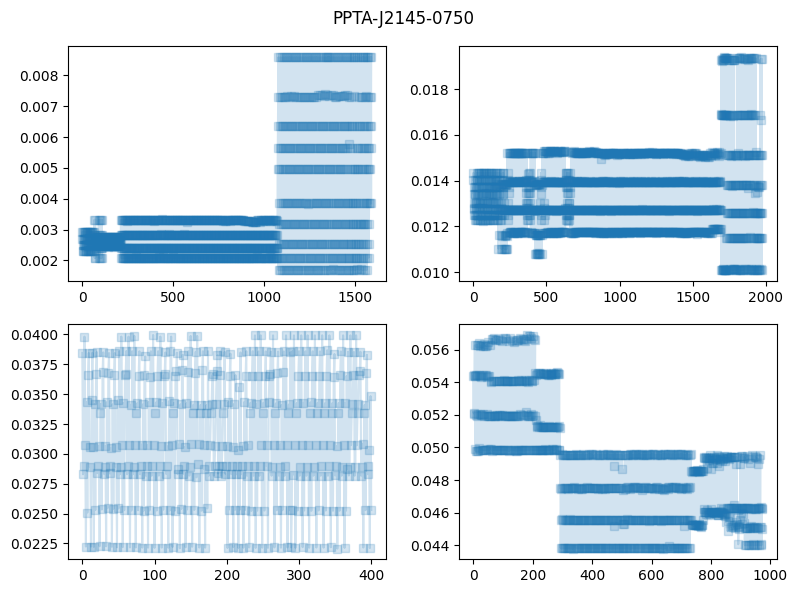

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(8,6))
axs[0,0].plot(delay_2145_1, marker = 's', alpha = 0.2)
axs[0,1].plot(delay_2145_2, marker = 's', alpha = 0.2)
axs[1,0].plot(delay_2145_3, marker = 's', alpha = 0.2)
axs[1,1].plot(delay_2145_4, marker = 's', alpha = 0.2)
fig.suptitle('PPTA-J2145-0750')
plt.tight_layout()
plt.show()

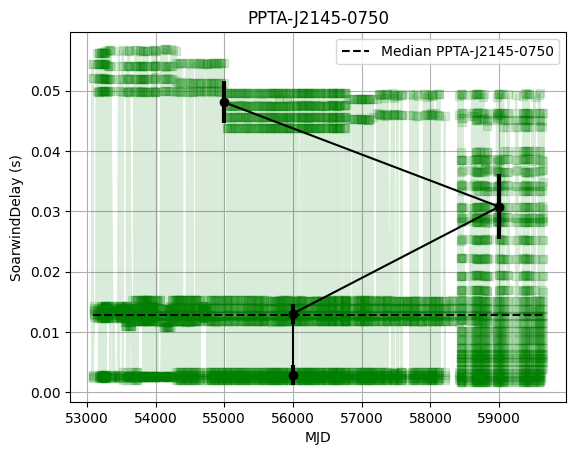

In [ ]:
x = [56000, 56000, 59000, 55000]
y = [np.median(delay_2145_1), np.median(delay_2145_2), np.median(delay_2145_3), np.median(delay_2145_4)]
y_error = [np.std(delay_2145_1), np.std(delay_2145_2), np.std(delay_2145_3),np.std(delay_2145_4)]
plt.plot((toa_2145_1), delay_ppta_2145_1, color='green', marker = 's', alpha = 0.15)
plt.errorbar(x, y, yerr= y_error, color='black', elinewidth = 3, fmt='o-')
plt.hlines(mid_2145, min(toa_2145_1), max(toa_2145_1),color='black', linestyle = '--', label='Median PPTA-J2145-0750')
plt.xlabel('MJD')
plt.ylabel('SoarwindDelay (s)')
plt.title('PPTA-J2145-0750')
plt.grid()
plt.legend()
plt.show()

In [ ]:
delay_ng_1713_1 = np.array(delay_ng_1713)
delay_ng_1713_1_1 = delay_ng_1713_1[(delay_ng_1713_1< 0.0098) & (delay_ng_1713_1 > 0.00)]
delay_ng_1713_2 = delay_ng_1713_1[(delay_ng_1713_1 < 0.0112) & (delay_ng_1713_1 > 0.0098)]
delay_ng_1713_3= delay_ng_1713_1[(delay_ng_1713_1 < 0.016) & (delay_ng_1713_1 > 0.0112)]

In [ ]:
mid_ng_1713 = np.median(delay_ng_1713_1)
mean_ng_1713 = np.mean(delay_ng_1713_1)
std_ng_1713 = np.std(delay_ng_1713_1)
mid_ng_1713, mean_ng_1713, std_ng_1713

(0.01026408331369661, 0.010363615889099259, 0.002370545434988157)

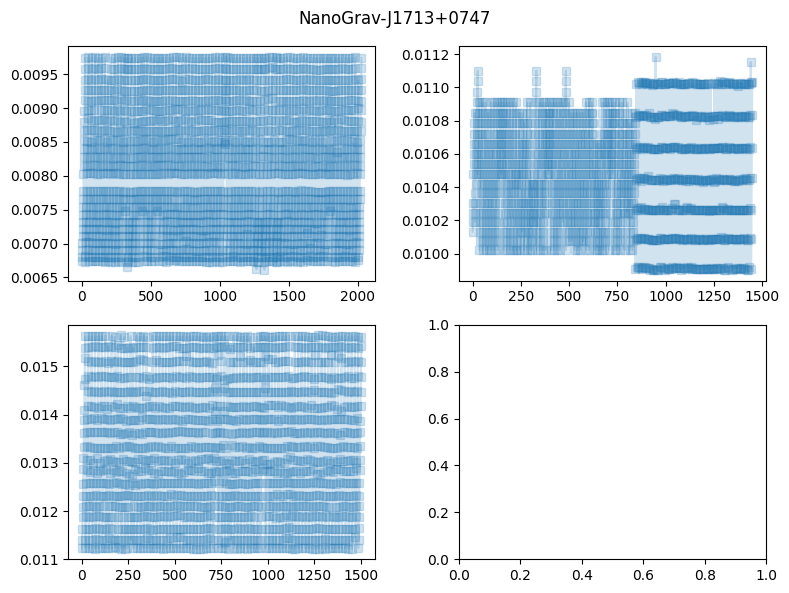

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(8,6))
fig.suptitle('NanoGrav-J1713+0747')
axs[0,0].plot(delay_ng_1713_1_1, marker = 's', alpha = 0.2)
axs[0,1].plot(delay_ng_1713_2, marker = 's', alpha = 0.2)
axs[1,0].plot(delay_ng_1713_3, marker = 's', alpha = 0.2)
plt.tight_layout()
plt.show()

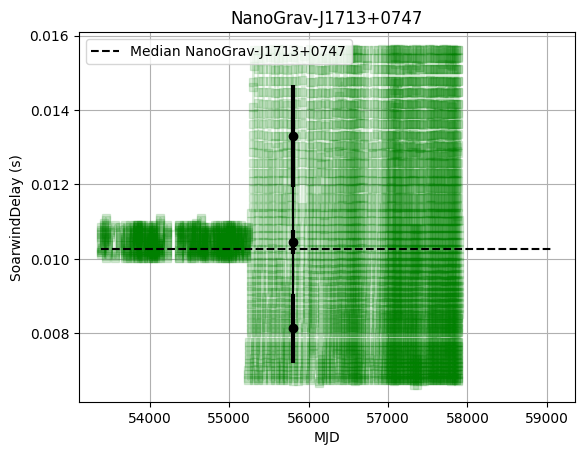

In [ ]:
x = [55800, 55800, 55800]
y = [np.median(delay_ng_1713_1_1), np.median(delay_ng_1713_2), np.median(delay_ng_1713_3)]
y_error = [np.std(delay_ng_1713_1_1), np.std(delay_ng_1713_2), np.std(delay_ng_1713_3)]
plt.plot((toa_ng_1713_3[:4982]), delay_ng_1713_1, color='green', marker = 's', alpha = 0.15)
plt.errorbar(x, y, yerr= y_error, color='black', elinewidth = 3, fmt='o-')
plt.hlines(mid_ng_1713, min(toa_ng_1713_2[:4982]), max(toa_ng_1713_2[:4982]),color='black', linestyle = '--', label='Median NanoGrav-J1713+0747')
plt.xlabel('MJD')
plt.ylabel('SoarwindDelay (s)')
plt.title('NanoGrav-J1713+0747')
plt.grid()
plt.legend()
plt.show()

In [ ]:
delay_ng_2124_1 = np.array(delay_ng_2124)
delay_ng_2124_1_1 = delay_ng_2124_1[(delay_ng_2124_1< 0.02) & (delay_ng_2124_1 > 0.005)]
delay_ng_2124_2 = delay_ng_2124_1[(delay_ng_2124_1 < 0.045) & (delay_ng_2124_1 > 0.025)]

In [ ]:
mid_ng_2124 = np.median(delay_ng_2124_1)
mean_ng_2124 = np.mean(delay_ng_2124_1)
std_ng_2124 = np.std(delay_ng_2124_1)
mid_ng_2124, mean_ng_2124, std_ng_2124

(0.014524459666837498, 0.020967398518309147, 0.012796888426309723)

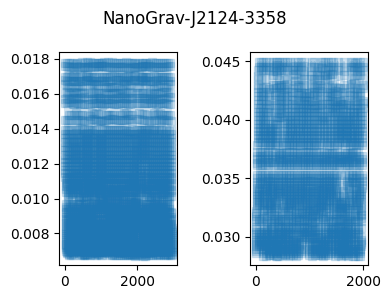

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(4,3))
fig.suptitle('NanoGrav-J2124-3358')
axs[0].plot(delay_ng_2124_1_1, marker = 's', alpha = 0.2)
axs[1].plot(delay_ng_2124_2, marker = 's', alpha = 0.2)
plt.tight_layout()
plt.show()

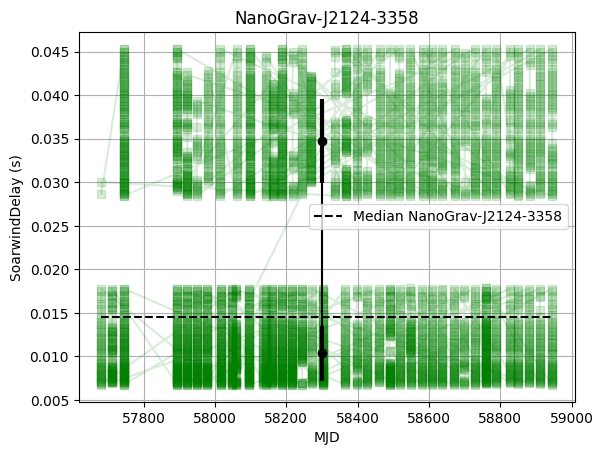

In [ ]:
x = [58300, 58300]
y = [np.median(delay_ng_2124_1_1), np.median(delay_ng_2124_2)]
y_error = [np.std(delay_ng_2124_1_1), np.std(delay_ng_2124_2)]
plt.plot((toa_ng_2124_2), delay_ng_2124_1, color='green', marker = 's', alpha = 0.15)
plt.errorbar(x, y, yerr= y_error, color='black', elinewidth = 3, fmt='o-')
plt.hlines(mid_ng_2124, min(toa_ng_2124_2), max(toa_ng_2124_2),color='black', linestyle = '--', label='Median NanoGrav-J2124-3358')
plt.xlabel('MJD')
plt.ylabel('SoarwindDelay (s)')
plt.title('NanoGrav-J2124-3358')
plt.grid()
plt.legend()
plt.show()

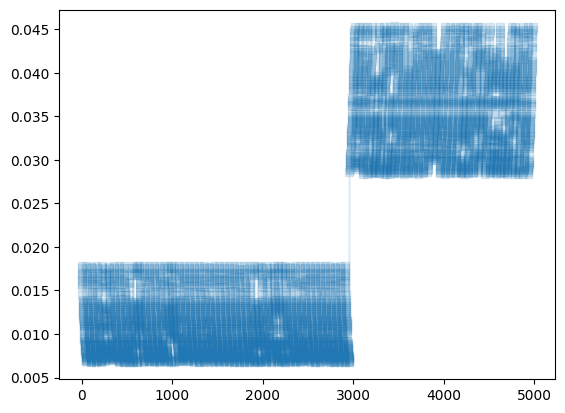

In [ ]:
plt.plot( delay_ng_2124_1,  marker = 's', alpha = 0.15)
plt.show()

In [ ]:
delay_ng_2145_1 = np.array(delay_ng_2145)
delay_ng_2145_1_1 = delay_ng_2145_1[(delay_ng_2145_1< 0.012) & (delay_ng_2145_1 > 0.00)]
delay_ng_2145_2 = delay_ng_2145_1[(delay_ng_2145_1 < 0.014) & (delay_ng_2145_1 > 0.012)]
delay_ng_2145_3= delay_ng_2145_1[(delay_ng_2145_1 < 0.02) & (delay_ng_2145_1 > 0.014)]

In [ ]:
mid_ng_2145 = np.median(delay_ng_2145_1)
mean_ng_2145 = np.mean(delay_ng_2145_1)
std_ng_2145 = np.std(delay_ng_2145_1)
mid_ng_2145, mean_ng_2145, std_ng_2145

(0.011191603520163965, 0.011465801046622573, 0.0031725430059969897)

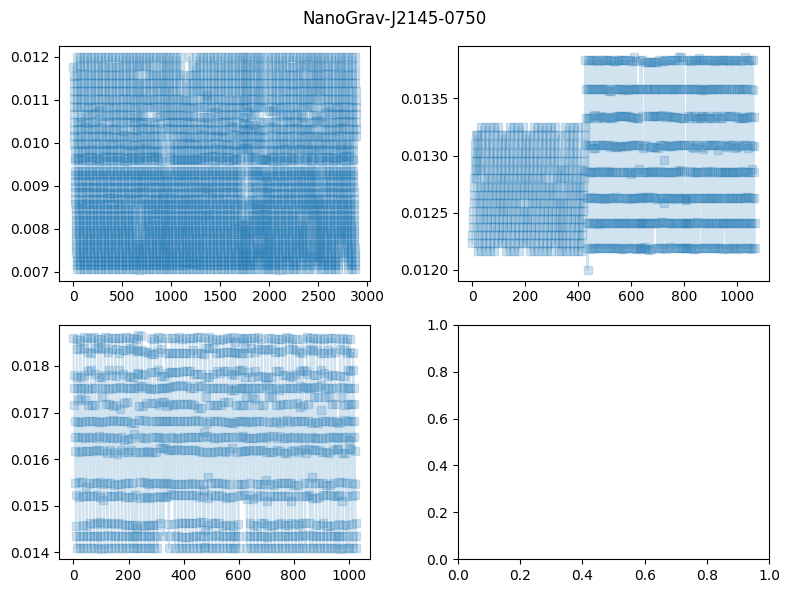

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(8,6))
fig.suptitle('NanoGrav-J2145-0750')
axs[0,0].plot(delay_ng_2145_1_1, marker = 's', alpha = 0.2)
axs[0,1].plot(delay_ng_2145_2, marker = 's', alpha = 0.2)
axs[1,0].plot(delay_ng_2145_3, marker = 's', alpha = 0.2)
plt.tight_layout()
plt.show()

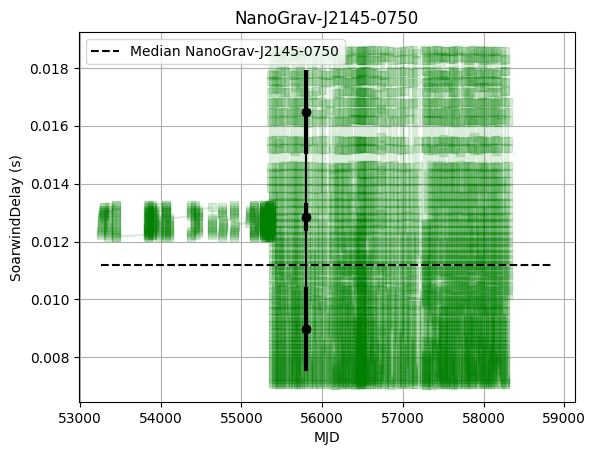

In [ ]:
x = [55800, 55800, 55800]
y = [np.median(delay_ng_2145_1_1), np.median(delay_ng_2145_2), np.median(delay_ng_2145_3)]
y_error = [np.std(delay_ng_2145_1_1), np.std(delay_ng_2145_2), np.std(delay_ng_2145_3)]
plt.plot((toa_ng_2145_3[:4982]), delay_ng_2145_1, color='green', marker = 's', alpha = 0.15)
plt.errorbar(x, y, yerr= y_error, color='black', elinewidth = 3, fmt='o-')
plt.hlines(mid_ng_2145, min(toa_ng_2145_2[:4982]), max(toa_ng_2145_2[:4982]),color='black', linestyle = '--', label='Median NanoGrav-J2145-0750')
plt.xlabel('MJD')
plt.ylabel('SoarwindDelay (s)')
plt.title('NanoGrav-J2145-0750')
plt.grid()
plt.legend()
plt.show()

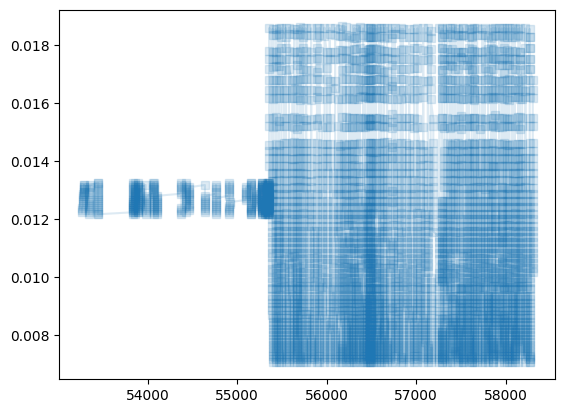

In [ ]:
plt.plot((toa_ng_2145_3[:4982]), delay_ng_2145_1,  marker = 's', alpha = 0.15)
plt.show()

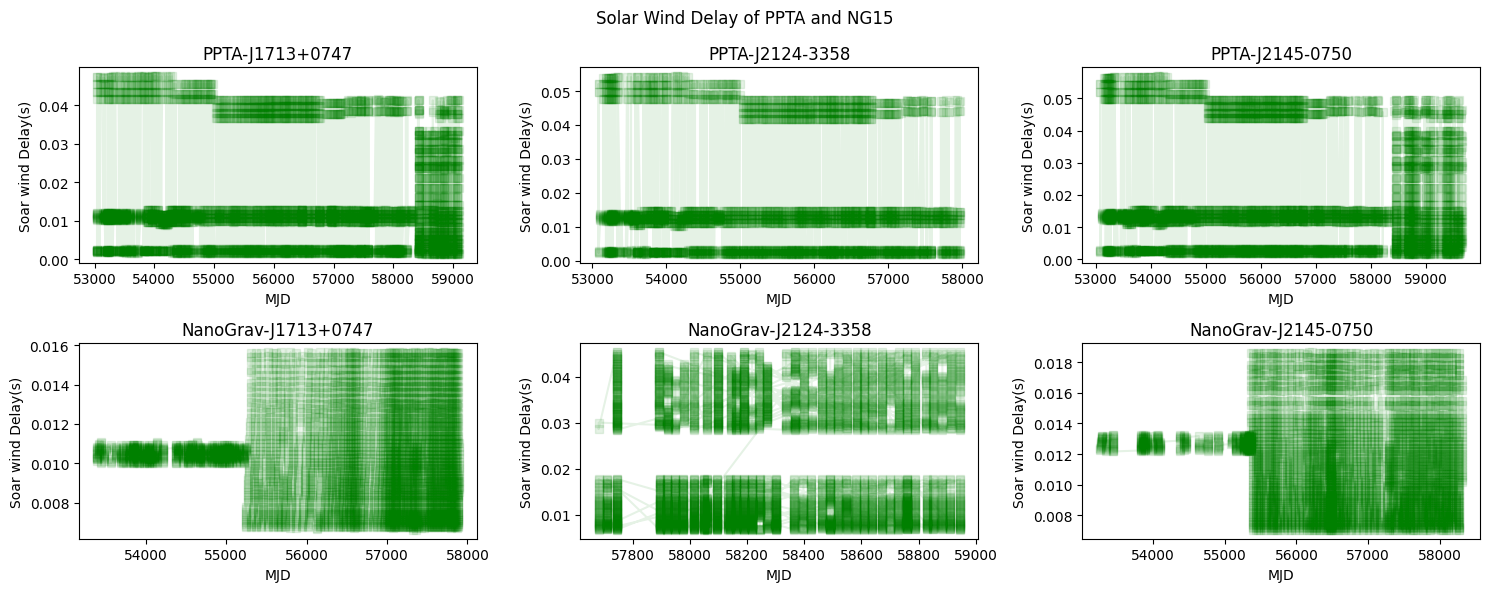

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15,6))
axs[0,0].plot((toa_1713_1[:4944]), delay_ppta_1713_1, color='green', marker = 's', alpha = 0.1)
axs[0,1].plot((toa_2124_1), delay_ppta_2124_1[:3411], color='green', marker = 's', alpha = 0.1)
axs[0,2].plot((toa_2145_1), delay_ppta_2145_1, color='green', marker = 's', alpha = 0.1)
axs[1,0].plot((toa_ng_1713_3[:4982]), delay_ng_1713_1, color='green', marker = 's', alpha = 0.1)
axs[1,1].plot((toa_ng_2124_2), delay_ng_2124_1, color='green', marker = 's', alpha = 0.1)
axs[1,2].plot((toa_ng_2145_3[:4982]), delay_ng_2145_1, color='green', marker = 's', alpha = 0.1)
axs[0,0].set_title('PPTA-J1713+0747')
axs[0,1].set_title('PPTA-J2124-3358')
axs[0,2].set_title('PPTA-J2145-0750')
axs[1,0].set_title('NanoGrav-J1713+0747')
axs[1,1].set_title('NanoGrav-J2124-3358')
axs[1,2].set_title('NanoGrav-J2145-0750')

for ax in axs.flat:
    ax.set_xlabel('MJD')
    ax.set_ylabel('Soar wind Delay(s)')

fig.suptitle('Solar Wind Delay of PPTA and NG15')
plt.tight_layout()
plt.show()